In [1]:
# Import necessary libraries
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Basic exploration
print("Shape of dataset:", df.shape)
print("\nClass distribution:")
print(df['target'].value_counts())

# Summary statistics
df.describe()

Shape of dataset: (178, 14)

Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Standardize the dataset using z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate performance
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
ari_kmeans = adjusted_rand_score(y, kmeans_labels)

print("K-Means Silhouette Score:", sil_kmeans)
print("K-Means Adjusted Rand Index:", ari_kmeans)

K-Means Silhouette Score: 0.2848589191898987
K-Means Adjusted Rand Index: 0.8974949815093207


In [3]:
!pip install numpy==1.24.4 scikit-learn==1.3.2 scikit-learn-extra==0.3.0


In [4]:
from sklearn_extra.cluster import KMedoids

# K-Medoids with k=3
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluate performance
sil_kmedoids = silhouette_score(X_scaled, kmedoids_labels)
ari_kmedoids = adjusted_rand_score(y, kmedoids_labels)

print("K-Medoids Silhouette Score:", sil_kmedoids)
print("K-Medoids Adjusted Rand Index:", ari_kmedoids)

K-Medoids Silhouette Score: 0.26597740204536796
K-Medoids Adjusted Rand Index: 0.7263406645756675


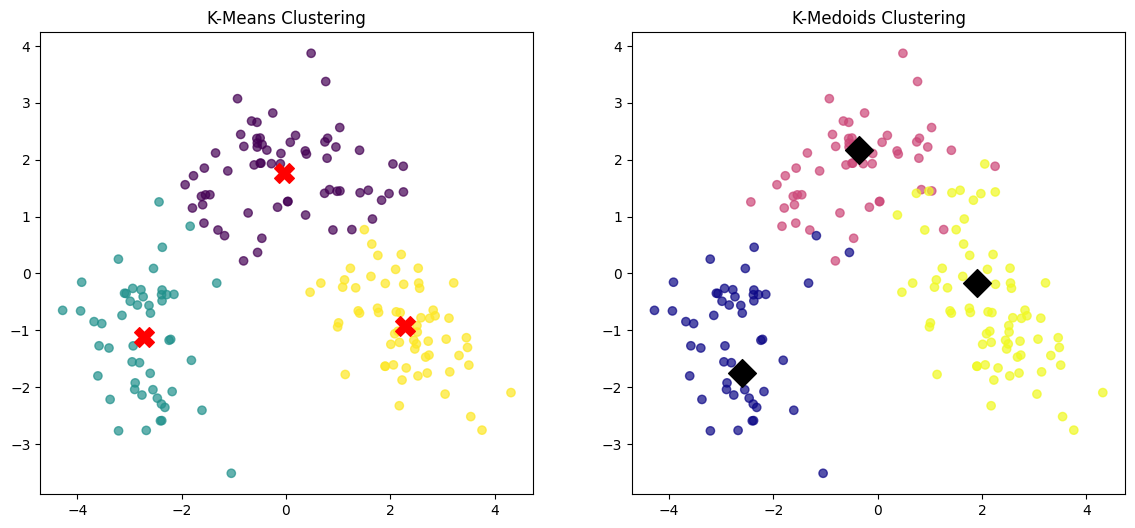

In [5]:
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means Plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
axes[0].scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], c='red', marker='X', s=200)
axes[0].set_title("K-Means Clustering")

# K-Medoids Plot
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='plasma', alpha=0.7)
axes[1].scatter(pca.transform(X_scaled[kmedoids.medoid_indices_])[:, 0], pca.transform(X_scaled[kmedoids.medoid_indices_])[:, 1], c='black', marker='D', s=200)
axes[1].set_title("K-Medoids Clustering")

plt.show()